In [1]:
import os
import glob
import numpy as np
import pandas as pd

from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr,spearmanr

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
bahav_data_dir = '/Users/li/Desktop/task-debate/behavdata'

sub_list_num = list(range(13,51))
sub_list_num.remove(21)

# time_points = list(range(0,3000,60)) + [2986]  # every 1 minute
# time_points = list(range(0,3000,120)) + [2986] # every 2 min
# time_points = list(range(0,3000,300)) + [2986] # every 5 min
# time_points = [0, 252, 500, 772, 1098, 1484, 1892, 2464, 2986] # every speaker
time_points = list(range(0,2987,2)) # every TR

all_subject_data = []
for sub in sub_list_num:
    file_path = os.path.join(bahav_data_dir, 'during_scan', 'combined_6runs_per_TR_filter', f'subject_{sub}_TR_rate.csv')
    
    df = pd.read_csv(file_path)
    sub_data = df[df['time'].isin(time_points)]
    all_subject_data.append(list(sub_data['rate']))
    
attitude = pd.DataFrame(all_subject_data)


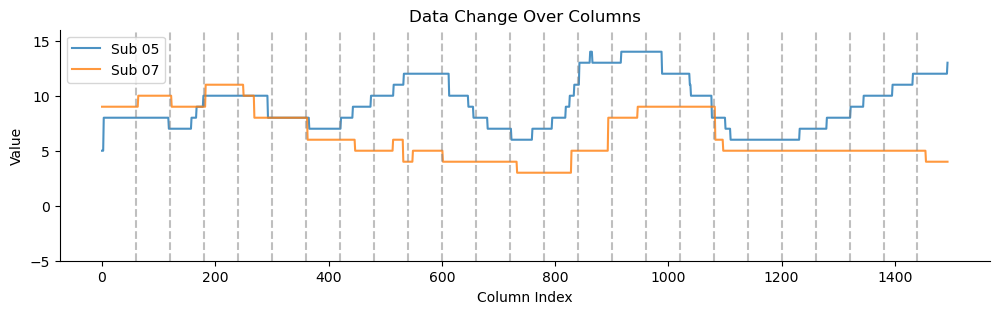

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# 确保 attitude 是 NumPy 数组，并转置
data = attitude.T  

# 创建图形
fig, ax = plt.subplots(figsize=(12, 3))

# 画折线图
ax.plot(data[4], label="Sub 05", alpha=0.8)
ax.plot(data[6], label="Sub 07", alpha=0.8)


# 每隔 30 个索引画一条竖线
for x in range(60, data.shape[0], 60):  
    ax.axvline(x=x, color='gray', linestyle='--', alpha=0.5)

# 设置标题和标签
ax.set_title("Data Change Over Columns")
ax.set_xlabel("Column Index")
ax.set_ylabel("Value")
ax.legend(loc="upper left")
ax.set_ylim(-5, 16)
# 去掉上边框和右边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 显示图像
plt.show()


In [137]:
bahav_data_dir = '/Users/li/Desktop/task-debate/behavdata'

sub_list_num = list(range(13,51))
sub_list_num.remove(21)

# time_points = list(range(0,3000,60)) + [2986]  # every 1 minute
time_points = list(range(0,3000,120)) + [2986] # every 2 min
# time_points = list(range(0,3000,300)) + [2986] # every 5 min
# time_points = [0, 252, 500, 772, 1098, 1484, 1892, 2464, 2986] # every speaker
# time_points = list(range(0,2987,2)) # every TR

all_subject_data = []
for sub in sub_list_num:
    file_path = os.path.join(bahav_data_dir, 'during_scan', 'combined_6runs_per_TR_filter', f'subject_{sub}_TR_rate.csv')
    
    df = pd.read_csv(file_path)
    sub_data = df[df['time'].isin(time_points)]
    all_subject_data.append(list(sub_data['rate']))
    
attitude = pd.DataFrame(all_subject_data)

start_attitude = pd.DataFrame(attitude)[0]
start_attitude_SM = -np.abs(start_attitude.values[:, np.newaxis] - start_attitude.values)

attitude_change = attitude.diff(axis=1)
attitude_change = attitude_change.drop(attitude_change.columns[0], axis=1)
print(attitude_change.shape)

attitude_change_distances = -pdist(attitude_change)
# attitude_change_distances = -np.sqrt(pdist(attitude_change))
# attitude_change_distances = -np.log(pdist(attitude_change))
attitude_change_distances_matrix = squareform(attitude_change_distances)
print(attitude_change_distances_matrix.shape)

SM2min = attitude_change_distances_matrix


(37, 25)
(37, 37)


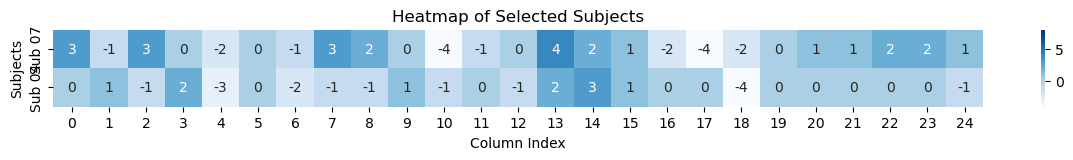

In [153]:
# 创建图形
fig, ax = plt.subplots(figsize=(15, 1))

# 画热图，并在每个格子标上数值
sns.heatmap(selected_data, cmap="Blues", cbar=True, annot=True, ax=ax, vmax = 8)

# 设置标签
ax.set_title("Heatmap of Selected Subjects")
ax.set_xlabel("Column Index")
ax.set_ylabel("Subjects")
ax.set_yticks([0.5, 1.5])
ax.set_yticklabels(["Sub 07", "Sub 04"])

# 显示图像
plt.show()